In [30]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [32]:
limit=1000
offset=0
params={
    '$limit':limit,
    '$offset':offset
}

In [33]:
url='https://data.buffalony.gov/resource/d6g9-xbgu.json'

In [34]:
import requests
import pandas as pd
from datetime import datetime

df_list = []
offset = 0
limit = 1000  # Adjust this value as needed
cutoff_date = datetime(2009, 1, 1)  # Set the cutoff date to the end of 2009

while True:
    params = {
        '$limit': limit,
        '$offset': offset,
        '$order': 'incident_datetime DESC'  # Sort by incident_datetime in descending order
    }
    response = requests.get(url, params=params)
    data = response.json()
    df_page = pd.DataFrame(data)
    
    if df_page.empty:
        break
    
    # Convert incident_datetime to datetime objects
    df_page['incident_datetime'] = pd.to_datetime(df_page['incident_datetime'])
    
    # Check if we've reached data before or equal to 2009
    if df_page['incident_datetime'].min() <= cutoff_date:
        # Filter out rows after 2009
        df_page = df_page[df_page['incident_datetime'] <= cutoff_date]
        df_list.append(df_page)
        break
    
    df_list.append(df_page)
    offset += limit

df = pd.concat(df_list, ignore_index=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259926 entries, 0 to 259925
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   case_number              259926 non-null  object        
 1   incident_datetime        259926 non-null  datetime64[ns]
 2   incident_type_primary    259926 non-null  object        
 3   incident_description     259926 non-null  object        
 4   parent_incident_type     259926 non-null  object        
 5   hour_of_day              259926 non-null  object        
 6   day_of_week              259926 non-null  object        
 7   address_1                259909 non-null  object        
 8   city                     259926 non-null  object        
 9   state                    259926 non-null  object        
 10  location                 253941 non-null  object        
 11  latitude                 258953 non-null  object        
 12  longitude       

In [37]:
df['incident_datetime']=pd.to_datetime(df['incident_datetime'],format='%Y-%m-%dT%H:%M:%S.%f')

In [42]:
df['incident_description'].value_counts()

incident_description
under investigation         255744
LARCENY/THEFT                 2012
BURGLARY                      1061
ASSAULT                        704
SEXUAL ABUSE                   146
UUV                            111
RAPE                            72
ROBBERY                         36
CRIM NEGLIGENT HOMICIDE         22
THEFT OF SERVICES               12
AGG ASSAULT ON P/OFFICER         2
AGGR ASSAULT                     2
MURDER                           2
Name: count, dtype: int64

In [47]:
df=df.sort_values(by='incident_datetime')

In [49]:
df['hour_of_day']=pd.to_datetime(df['hour_of_day'],format='%H')

In [50]:
df.isnull().sum()

case_number                     0
incident_datetime               0
incident_type_primary           0
incident_description            0
parent_incident_type            0
hour_of_day                     0
day_of_week                     0
address_1                      33
city                            0
state                           0
location                     5985
latitude                     5985
longitude                    5985
created_at                 189397
zip_code                     3273
neighborhood                 5971
council_district             2282
council_district_2011        3327
census_tract                 5878
census_block_group           5878
census_block                 5878
census_tract_2010           19425
census_block_group_2010     19457
census_block_2010           19427
police_district              5885
tractce20                    5878
geoid20_tract                5878
geoid20_blockgroup           5878
geoid20_block                5878
dtype: int64

In [51]:
df=df[df['incident_datetime']>='2009']


In [52]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,created_at,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block
259012,09-0640645,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,1900-01-01 00:00:00,Thursday,300 Block LOEPERE ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.834, 42....",42.902,-78.834,NaN,14211,Broadway Fillmore,ELLICOTT,FILLMORE,27.04,1,1005,27.02,1,1005,District C,002704,36029002704,360290001101,360290002001005
259011,09-0830328,2009-01-01 00:00:00,SEXUAL ABUSE,under investigation,Other Sexual Offense,1900-01-01 00:00:00,Thursday,1000 Block W DELAVAN AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.861, 42....",42.922,-78.861,NaN,14209,Elmwood Bidwell,ELLICOTT,ELLICOTT,169,4,4002,169,4,4000,District D,016900,36029016900,360290002004,360290002004002
259010,09-2740354,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,1900-01-01 00:00:00,Thursday,2700 Block MAIN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.838, 42....",42.941,-78.838,2009-10-03T01:01:00.000,14214,Central Park,DELAWARE,DELAWARE,45,4,4011,45,4,4011,District D,004500,36029004500,360290002004,360290031004011
259009,09-2290896,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,1900-01-01 00:00:00,Thursday,1 Block KIMBERLY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.812, 42....",42.838,-78.812,NaN,14220,South Park,SOUTH,SOUTH,7,5,5006,7,5,5006,District A,000700,36029000700,360290007005,360290034005006
259008,09-0810383,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,1900-01-01 00:00:00,Thursday,1 Block 15TH ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.885, 42....",42.906,-78.885,NaN,14213,West Side,NIAGARA,NIAGARA,69.03,1,1004,69.02,1,1004,District B,006903,36029006903,360290001101,360290055001004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,24-2790957,2024-10-05 20:14:47,LARCENY/THEFT,under investigation,Theft,1900-01-01 20:00:00,Saturday,1700 Block HERTEL AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.842, 42....",42.948,-78.842,2024-10-05T20:15:47.000,14216,Central Park,DELAWARE,DELAWARE,45,6,6008,45,6,6010,District D,004500,36029004500,360290045006,360290045006008
3,24-2790986,2024-10-05 20:42:53,BURGLARY,under investigation,Breaking & Entering,1900-01-01 20:00:00,Saturday,0 Block JOHNSON PK,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.878, 42....",42.893,-78.878,2024-10-05T20:42:53.000,14201,Lower West Side,FILLMORE,FILLMORE,71.02,2,2001,71.02,2,2001,District B,007102,36029007102,360290071022,360290071022001
2,24-2791129,2024-10-05 22:49:08,ASSAULT,under investigation,Assault,1900-01-01 22:00:00,Saturday,100 Block WILLIAM ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.868, 42....",42.885,-78.868,2024-10-05T22:49:08.000,14204,Pratt-Willert,ELLICOTT,ELLICOTT,14.03,2,2003,14.02,3,3003,District B,001403,36029001403,360290014032,360290014032003
1,24-2800210,2024-10-06 06:14:07,LARCENY/THEFT,under investigation,Theft,1900-01-01 06:00:00,Sunday,400 Block SWAN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.861, 42....",42.879,-78.861,2024-10-06T06:14:07.000,14204,Ellicott,ELLICOTT,ELLICOTT,164,3,3005,164,4,4005,District A,016400,36029016400,360290164003,360290164003005


## Task 2

### How have the proportions of different crime types changed over time?

This question is important for our analysis because it facilitates a temporal examination of the data, providing a comprehensive view of crime patterns over time. Understanding how the proportions of different crime types have evolved allows us to identify trends and shifts in criminal activity. This knowledge will contribute to building a more effective predictive model.

### How does the distribution of crime incidents vary across police districts in Buffalo?

By integrating crime incident data with distinct police district information, we gain a unique perspective on spatial crime patterns that was not initially available in the original dataset. This cross-referencing of data sources enhances our ability to contextualize crime incidents within specific jurisdictional boundaries, potentially revealing correlations between district characteristics and crime types. Such insights are invaluable for developing a more comprehensive predictive model.

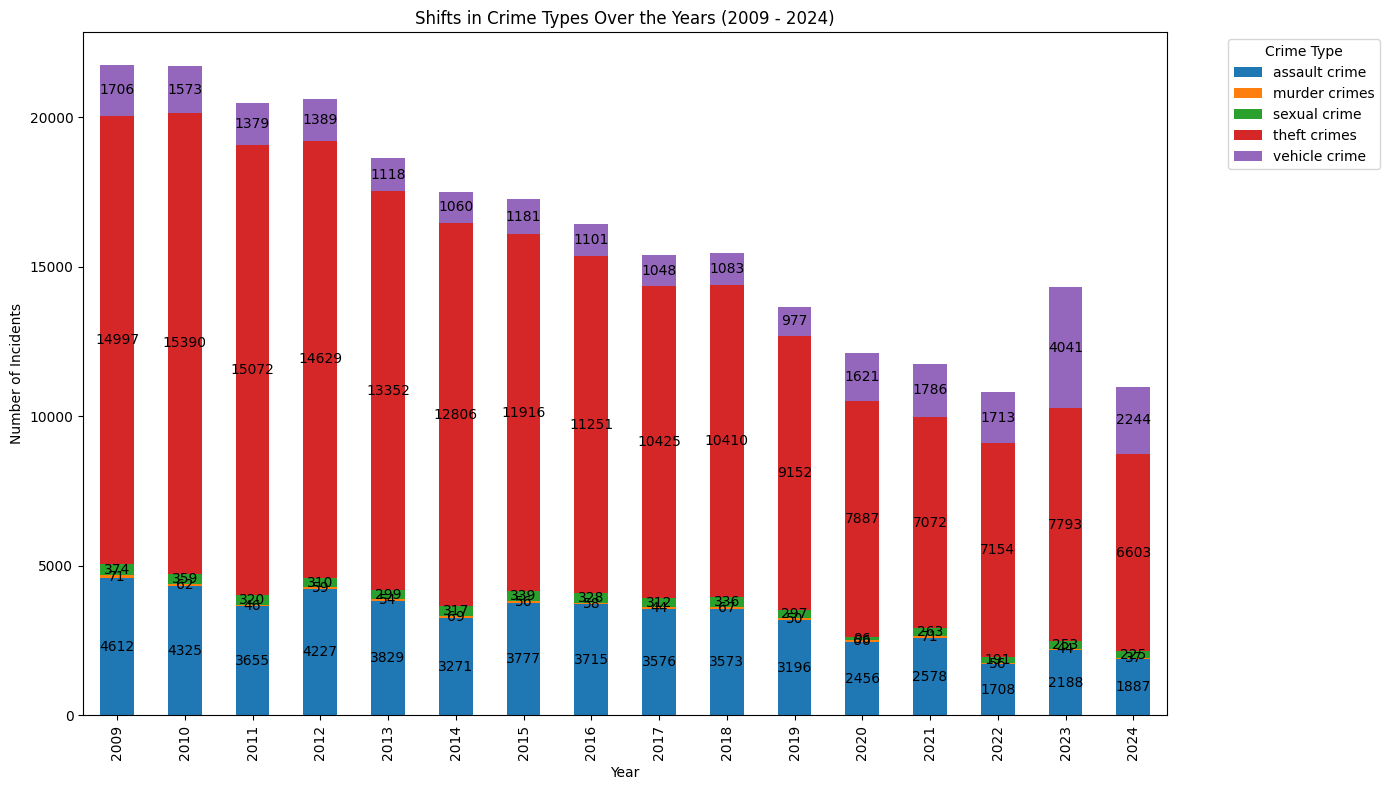

Missing values in theft crime data:
incident_datetime        0
incident_type_primary    0
dtype: int64


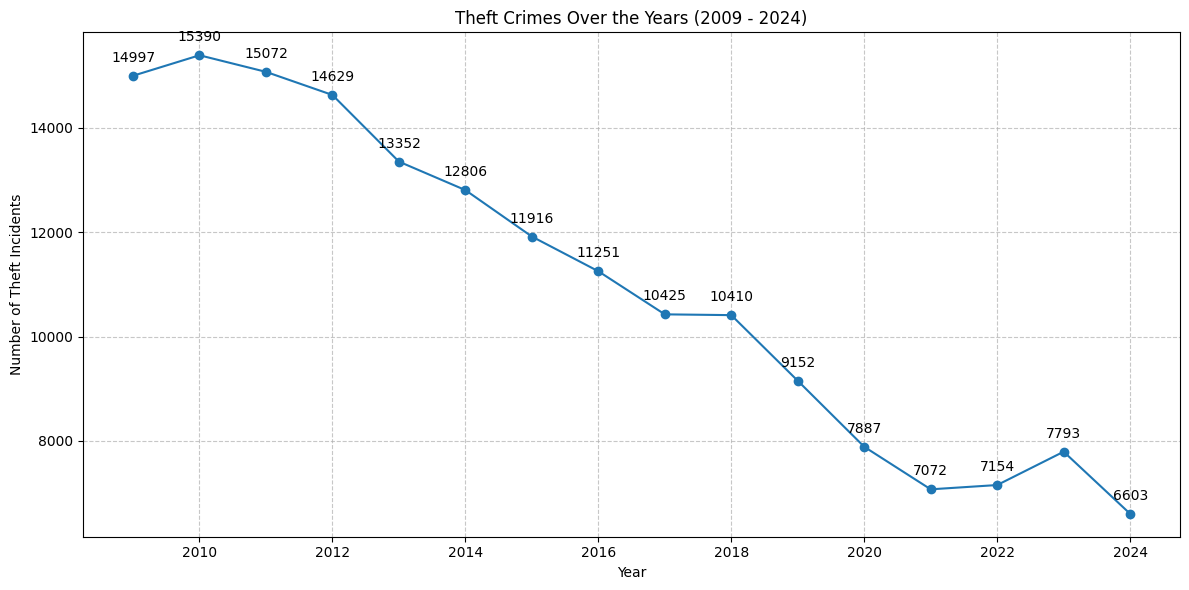

Standard Deviation of Crime Type Ratios:
incident_type_primary
assault crime    0.025949
murder crimes    0.001062
sexual crime     0.003532
theft crimes     0.051739
vehicle crime    0.064386
total_crimes     0.000000
dtype: float64

The most stable crime type ratio is: total_crimes with a standard deviation of 0.0


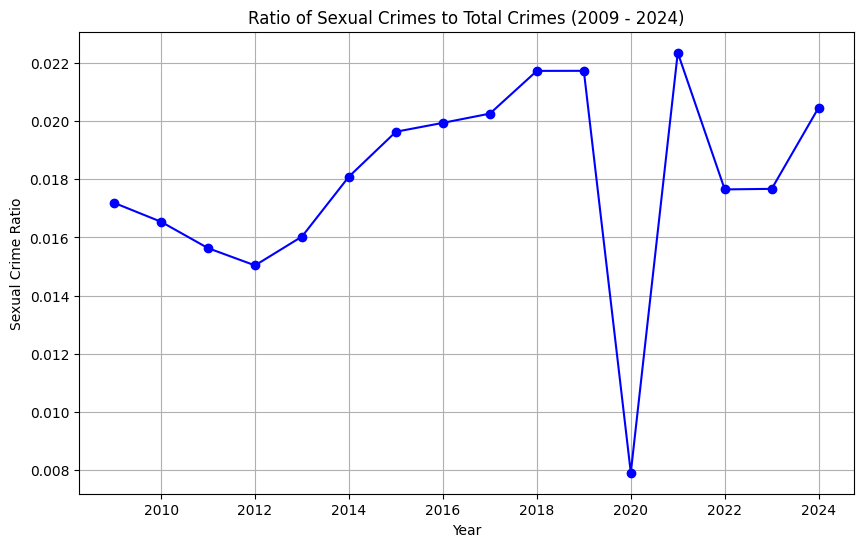

In [89]:
import seaborn as sns
data=df
data
#Data Cleaning
# Convert 'incident_datetime' to datetime if not already
data['incident_datetime'] = pd.to_datetime(data['incident_datetime'])
# Convert all values in 'incident_type_primary' column to lowercase for consistency
data['incident_type_primary'] = data['incident_type_primary'].str.lower()
 
# Grouping specific crime types into broader categories for simplified analysis
sexual_crimes = ['other sexual offense','sexual assault', 'rape', 'sexual abuse', 'sodomy']
assault_crimes=['agg assault on p/officer', 'aggr assault', 'assault']
vehicle_crimes=['theft of vehicles', 'uuv','theft of vehicle']
theft_crimes=['burglary', 'larceny/theft','robbery', 'theft of services','theft', 'breaking & entering']
murder_crimes=['crim negligent homicide', 'homicide', 'manslaughter', 'murder']
data['incident_type_primary'] = data['incident_type_primary'].replace(sexual_crimes, 'sexual crime')
data['incident_type_primary'] = data['incident_type_primary'].replace(assault_crimes, 'assault crime')
data['incident_type_primary'] = data['incident_type_primary'].replace(vehicle_crimes, 'vehicle crime')
data['incident_type_primary'] = data['incident_type_primary'].replace(theft_crimes,'theft crimes')
data['incident_type_primary'] = data['incident_type_primary'].replace(murder_crimes,'murder crimes')

# Extract year from 'incident_datetime'
data['year'] = data['incident_datetime'].dt.year

# Group by year and incident type, then count occurrences
crime_counts = data.groupby(['year', 'incident_type_primary']).size().unstack(fill_value=0)

# Create a stacked bar plot
ax = crime_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Shifts in Crime Types Over the Years (2009 - 2024)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

# Check for missing values in key columns
missing_values = data[data['incident_type_primary'] == 'theft crimes'][['incident_datetime', 'incident_type_primary']].isnull().sum()

print("Missing values in theft crime data:")
print(missing_values)
# Filter for theft crimes and group by year
theft_data = data[data['incident_type_primary'] == 'theft crimes']
theft_counts = theft_data.groupby('year').size().reset_index(name='count')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(theft_counts['year'], theft_counts['count'], marker='o')

plt.title('Theft Crimes Over the Years (2009 - 2024)')
plt.xlabel('Year')
plt.ylabel('Number of Theft Incidents')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on the points
for x, y in zip(theft_counts['year'], theft_counts['count']):
    plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

#Calculate the total number of crimes each year
crime_counts['total_crimes'] = crime_counts.sum(axis=1)

# Calculate the ratio of each crime type to total crimes
crime_ratios = crime_counts.div(crime_counts['total_crimes'], axis=0)

# Calculate the standard deviation for each crime type's ratio
crime_ratio_std_dev = crime_ratios.std()

# Print the standard deviations
print("Standard Deviation of Crime Type Ratios:")
print(crime_ratio_std_dev)

# Identify the most stable (lowest standard deviation) crime type ratio
most_stable_ratio = crime_ratio_std_dev.idxmin()
print(f"\nThe most stable crime type ratio is: {most_stable_ratio} with a standard deviation of {crime_ratio_std_dev[most_stable_ratio]}")


# Calculate the ratio of assault crimes to total crimes for each year
crime_counts['sexual_ratio'] = crime_counts['sexual crime'] / crime_counts['total_crimes']

# Plotting the ratio over the years
plt.figure(figsize=(10, 6))
plt.plot(crime_counts.index, crime_counts['sexual_ratio'], marker='o', color='b')
plt.title('Ratio of Sexual Crimes to Total Crimes (2009 - 2024)')
plt.xlabel('Year')
plt.ylabel('Sexual Crime Ratio')
plt.grid(True)
plt.show()

# Task 5

## Question 1: How have the proportions of different crime types changed over time?

### Hypotheses:

#### 1. Theft crimes have decreased significantly over the years.

**Observations:**

The analysis of stack bar graphs and line graphs reveals a significant decline in the number of theft crimes over the years. This downward trend suggests a positive impact of measures taken to reduce such incidents or changes in reporting and recording practices.

**EDA Steps:**

1. **Visualizing Crime Trends:**
    - To understand the shifting dynamics of crime types over the years, we will plot stacked bar graphs. These visualizations will help us observe changes in the proportions of various crime types annually.
    
2. **Data Granularity Verification:**
    - Ensuring the granularity of the theft crime data is critical. We will check that each incident is reported with precise time values (date and time) and verify that there are no missing values. This step ensures the accuracy and reliability of our analysis.
    
3. **Temporal Analysis:**
    - To illustrate the decrease in theft crimes, we will create line graphs showing the temporal change. These graphs will highlight the gradual decline in theft crimes year by year, providing a clear visual representation of the trend.

**Importance:**

This hypothesis is significant as it demonstrates a notable downward trend in theft crimes. Understanding this trend is essential for policymakers and law enforcement agencies as it highlights the effectiveness of their strategies over time. Additionally, it underscores the importance of considering the time span of the data for ensuring the model's accuracy and relevance.

---

#### 2. Sexual crimes have remained stable compared to other types.

**Observations:**

Our analysis indicates that the number of sexual crimes has remained relatively constant over the years, unlike other crime types that may have fluctuated significantly. This stability suggests a persistent issue that requires continuous attention and intervention.

**EDA Steps:**

1. **Scope and Ratio Calculation:**
    - To quantify the stability of sexual crimes, we will calculate the ratio of sexual crimes to the total number of crimes each year. This ratio will provide a normalized view, allowing us to compare the proportions across different years regardless of the total crime volume.
    
2. **Standard Deviation Analysis:**
    - By calculating the standard deviation of the ratios for different crime types, we can identify which crime types are most stable over time. A lower standard deviation indicates less variation and more stability.
    
3. **Stability Visualization:**
    - We will plot a graph showing the ratio of sexual crimes to the total number of crimes each year. This visualization will highlight the stability of sexual crimes relative to other crime types, providing insights into long-term trends.

**Importance:**

The stability in sexual crime rates is crucial for several reasons. Firstly, it can serve as a baseline for predicting future incidents, which is valuable for developing accurate predictive models. Secondly, understanding this stability helps in resource allocation and strategic planning for law enforcement and support services. Continuous monitoring and analysis of these trends are necessary to address and mitigate such crimes effectively.

These hypotheses and corresponding EDA steps provide a comprehensive understanding of the changes in crime proportions over time. This analysis is critical for developing accurate predictive models, informing policy decisions, and understanding the effectiveness of crime prevention strategies. By examining the trends and stability of different crime types, we can gain valuable insights into the dynamics of crime and take informed actions to improve public safety.

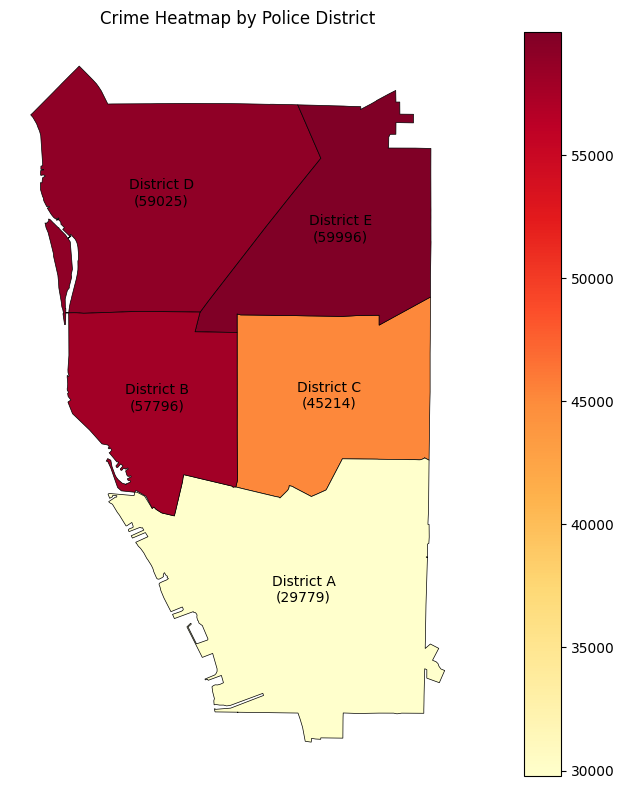

In [68]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Load the crime dataset
crime_data = df.copy()

# Convert crime data to GeoDataFrame
gdf_crimes = gpd.GeoDataFrame(
    crime_data, 
    geometry=gpd.points_from_xy(crime_data.longitude, crime_data.latitude),
    crs="EPSG:4326"
)

# Load the police district data
police_districts_df = pd.read_csv('/Users/mohith/Downloads/Police_Districts_20241006.csv')

# Convert the 'Geometry' column to shapely geometries
police_districts_df['geometry'] = police_districts_df['Geometry'].apply(wkt.loads)

# Create a GeoDataFrame
police_districts = gpd.GeoDataFrame(police_districts_df, geometry='geometry', crs="EPSG:4326")

# Ensure both GeoDataFrames have the same CRS
police_districts = police_districts.to_crs(gdf_crimes.crs)

# Perform spatial join
crimes_with_districts = gpd.sjoin(gdf_crimes, police_districts, how="inner", predicate="within")

# Count crimes per police district
crime_counts = crimes_with_districts['District Name'].value_counts().reset_index()
crime_counts.columns = ['District Name', 'Crime Count']

# Merge crime counts with police district geometries
police_districts = police_districts.merge(crime_counts, on='District Name', how='left')

# Fill NaN values with 0 for districts with no crimes
police_districts['Crime Count'] = police_districts['Crime Count'].fillna(0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
police_districts.plot(column='Crime Count', ax=ax, legend=True, cmap='YlOrRd', edgecolor='black', linewidth=0.5)

# Customize the plot
ax.set_title('Crime Heatmap by Police District')
ax.axis('off')

# Add labels for each district
for idx, row in police_districts.iterrows():
    ax.annotate(text=f"{row['District Name']}\n({row['Crime Count']})", 
                xy=row['geometry'].centroid.coords[0], 
                ha='center', va='center')

plt.tight_layout()
plt.show()

In [55]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,created_at,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,year
259012,09-0640645,2009-01-01 00:00:00,theft crimes,under investigation,Theft,1900-01-01 00:00:00,Thursday,300 Block LOEPERE ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.834, 42....",42.902,-78.834,NaN,14211,Broadway Fillmore,ELLICOTT,FILLMORE,27.04,1,1005,27.02,1,1005,District C,002704,36029002704,360290001101,360290002001005,2009
259011,09-0830328,2009-01-01 00:00:00,sexual crime,under investigation,Other Sexual Offense,1900-01-01 00:00:00,Thursday,1000 Block W DELAVAN AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.861, 42....",42.922,-78.861,NaN,14209,Elmwood Bidwell,ELLICOTT,ELLICOTT,169,4,4002,169,4,4000,District D,016900,36029016900,360290002004,360290002004002,2009
259010,09-2740354,2009-01-01 00:00:00,theft crimes,under investigation,Theft,1900-01-01 00:00:00,Thursday,2700 Block MAIN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.838, 42....",42.941,-78.838,2009-10-03T01:01:00.000,14214,Central Park,DELAWARE,DELAWARE,45,4,4011,45,4,4011,District D,004500,36029004500,360290002004,360290031004011,2009
259009,09-2290896,2009-01-01 00:00:00,theft crimes,under investigation,Theft,1900-01-01 00:00:00,Thursday,1 Block KIMBERLY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.812, 42....",42.838,-78.812,NaN,14220,South Park,SOUTH,SOUTH,7,5,5006,7,5,5006,District A,000700,36029000700,360290007005,360290034005006,2009
259008,09-0810383,2009-01-01 00:00:00,theft crimes,under investigation,Theft,1900-01-01 00:00:00,Thursday,1 Block 15TH ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.885, 42....",42.906,-78.885,NaN,14213,West Side,NIAGARA,NIAGARA,69.03,1,1004,69.02,1,1004,District B,006903,36029006903,360290001101,360290055001004,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,24-2790957,2024-10-05 20:14:47,theft crimes,under investigation,Theft,1900-01-01 20:00:00,Saturday,1700 Block HERTEL AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.842, 42....",42.948,-78.842,2024-10-05T20:15:47.000,14216,Central Park,DELAWARE,DELAWARE,45,6,6008,45,6,6010,District D,004500,36029004500,360290045006,360290045006008,2024
3,24-2790986,2024-10-05 20:42:53,theft crimes,under investigation,Breaking & Entering,1900-01-01 20:00:00,Saturday,0 Block JOHNSON PK,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.878, 42....",42.893,-78.878,2024-10-05T20:42:53.000,14201,Lower West Side,FILLMORE,FILLMORE,71.02,2,2001,71.02,2,2001,District B,007102,36029007102,360290071022,360290071022001,2024
2,24-2791129,2024-10-05 22:49:08,assault crime,under investigation,Assault,1900-01-01 22:00:00,Saturday,100 Block WILLIAM ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.868, 42....",42.885,-78.868,2024-10-05T22:49:08.000,14204,Pratt-Willert,ELLICOTT,ELLICOTT,14.03,2,2003,14.02,3,3003,District B,001403,36029001403,360290014032,360290014032003,2024
1,24-2800210,2024-10-06 06:14:07,theft crimes,under investigation,Theft,1900-01-01 06:00:00,Sunday,400 Block SWAN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.861, 42....",42.879,-78.861,2024-10-06T06:14:07.000,14204,Ellicott,ELLICOTT,ELLICOTT,164,3,3005,164,4,4005,District A,016400,36029016400,360290164003,360290164003005,2024


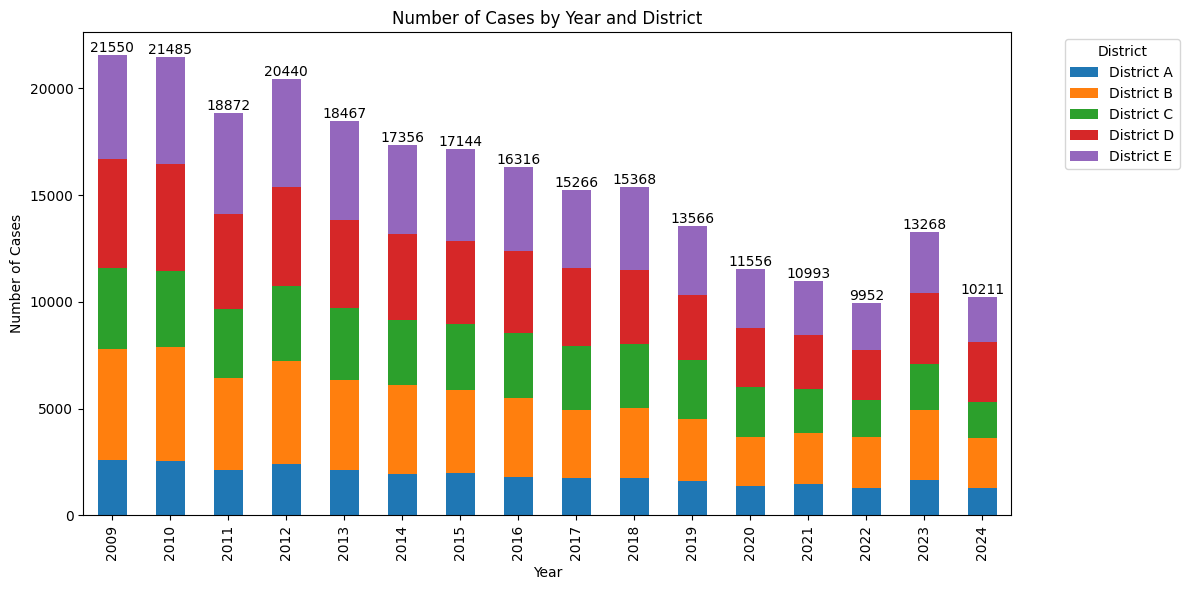

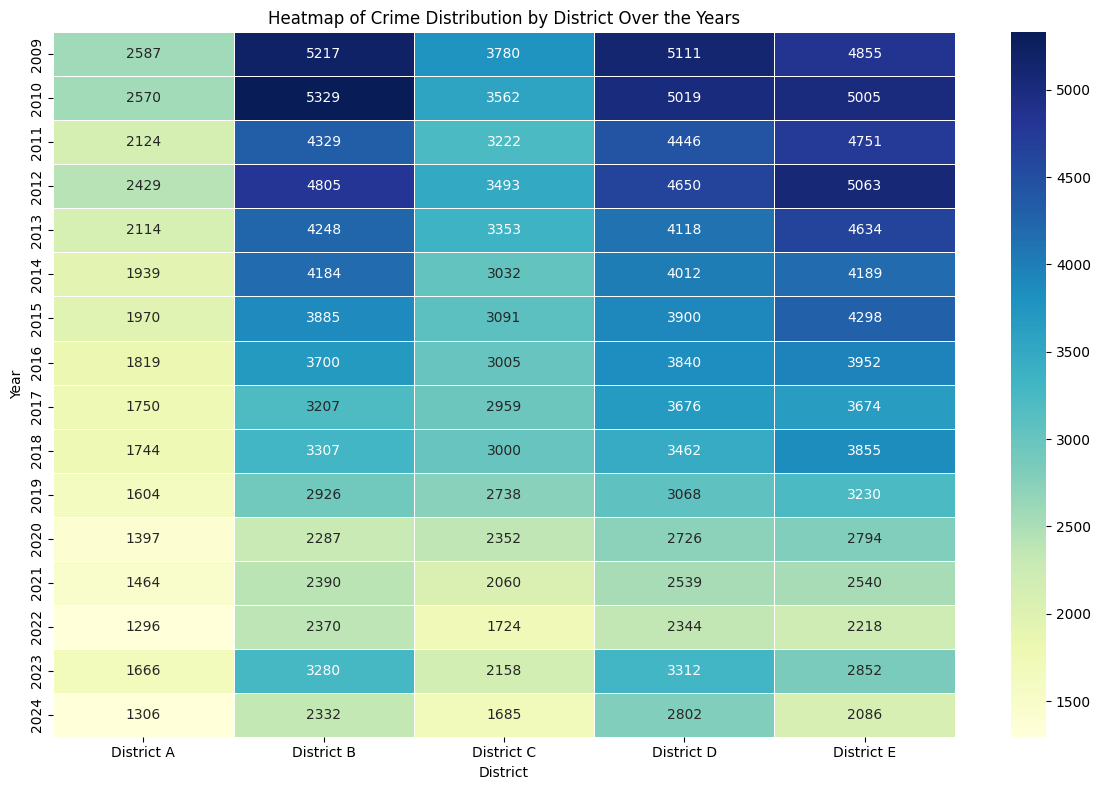

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
import seaborn as sns

# Load the crime dataset
crime_data = df.copy()

# Convert incident_datetime to datetime type
crime_data['incident_datetime'] = pd.to_datetime(crime_data['incident_datetime'])

# Extract year from incident_datetime
crime_data['year'] = crime_data['incident_datetime'].dt.year

# Load the police district data
police_districts_df = pd.read_csv('/Users/mohith/Downloads/Police_Districts_20241006.csv')

# Convert the 'Geometry' column to shapely geometries
police_districts_df['geometry'] = police_districts_df['Geometry'].apply(wkt.loads)

# Create a GeoDataFrame
police_districts = gpd.GeoDataFrame(police_districts_df, geometry='geometry', crs="EPSG:4326")

# Convert crime data to GeoDataFrame
gdf_crimes = gpd.GeoDataFrame(
    crime_data, 
    geometry=gpd.points_from_xy(crime_data.longitude, crime_data.latitude),
    crs="EPSG:4326"
)

# Perform spatial join
crimes_with_districts = gpd.sjoin(gdf_crimes, police_districts, how="inner", predicate="within")

# Group by year and district, and count the number of cases
case_counts = crimes_with_districts.groupby(['year', 'District Name']).size().unstack(fill_value=0)

# Create the stacked bar graph
ax = case_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Number of Cases by Year and District')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add total case numbers on top of each bar
for i, total in enumerate(case_counts.sum(axis=1)):
    plt.text(i, total, f'{total}', ha='center', va='bottom')

# Show the plot
plt.show()
case_counts = crimes_with_districts.groupby(['year', 'incident_type_primary']).size().reset_index(name='count')

# Group by year and district, and count the number of cases
case_counts = crimes_with_districts.groupby(['year', 'District Name']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(case_counts, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

# Customize the plot
plt.title('Heatmap of Crime Distribution by District Over the Years')
plt.xlabel('District')
plt.ylabel('Year')
plt.tight_layout()

# Show the plot
plt.show()


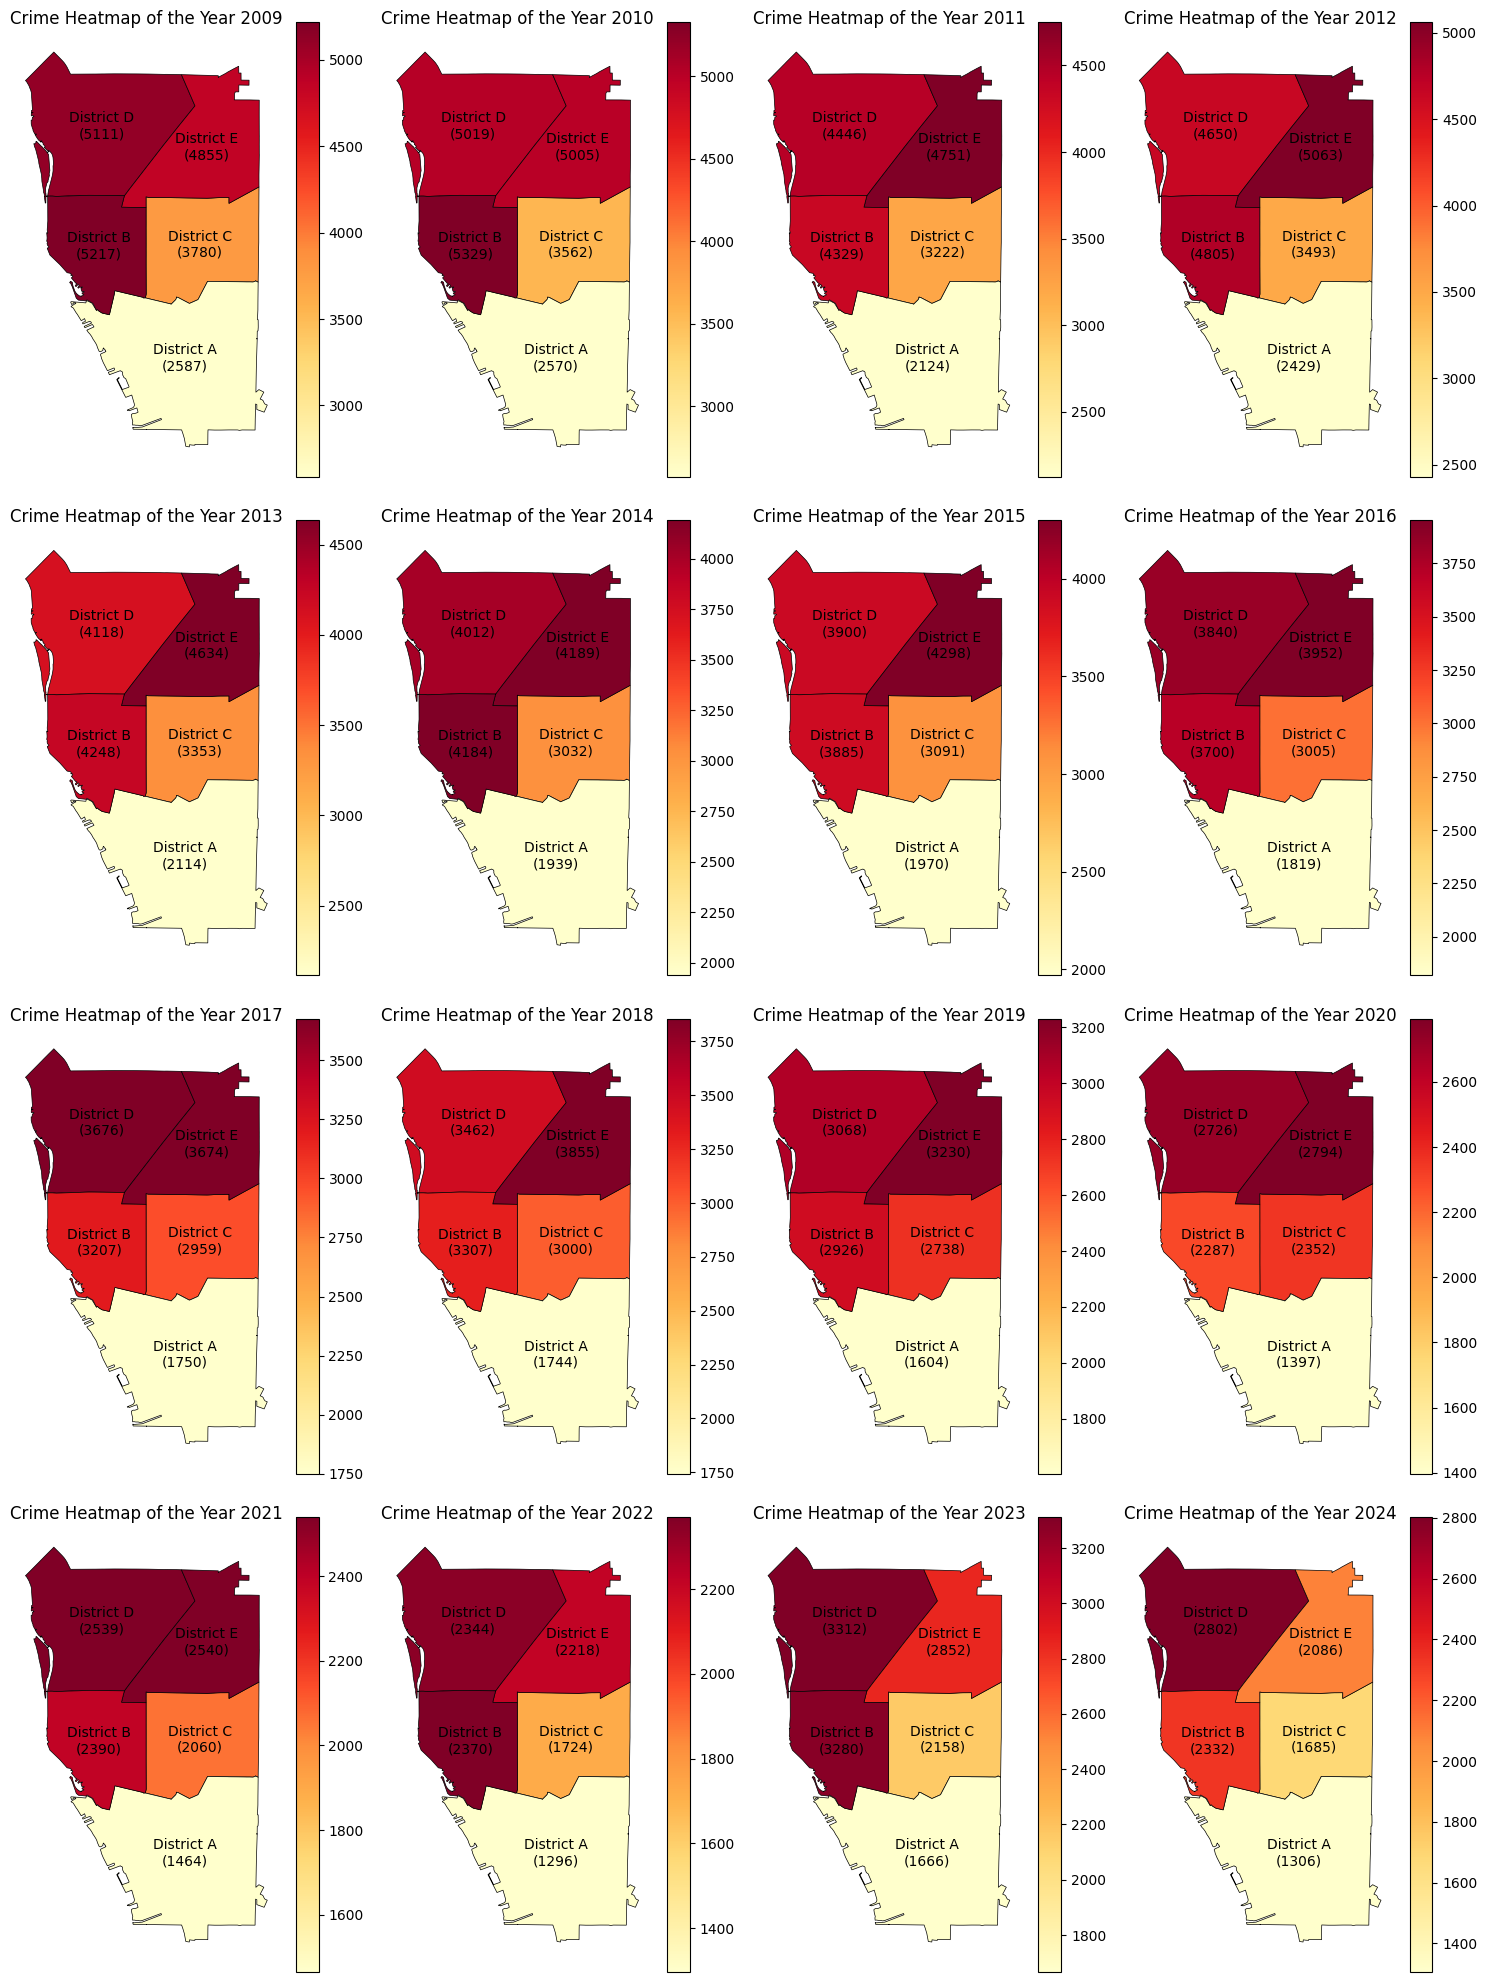

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Load the crime dataset
crime_data = df.copy()

# Convert crime data to GeoDataFrame
gdf_crimes = gpd.GeoDataFrame(
    crime_data, 
    geometry=gpd.points_from_xy(crime_data.longitude, crime_data.latitude),
    crs="EPSG:4326"
)

# Load the police district data
police_districts_df = pd.read_csv('/Users/mohith/Downloads/Police_Districts_20241006.csv')

# Convert the 'Geometry' column to shapely geometries
police_districts_df['geometry'] = police_districts_df['Geometry'].apply(wkt.loads)

# Create a GeoDataFrame
police_districts = gpd.GeoDataFrame(police_districts_df, geometry='geometry', crs="EPSG:4326")

# Ensure both GeoDataFrames have the same CRS
police_districts = police_districts.to_crs(gdf_crimes.crs)

# Get the list of unique years
years = gdf_crimes['year'].unique()

# Set up the figure and axes for subplots
n_cols = 4 # Number of columns for subplots
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Loop through each year to create individual heatmaps
for idx, year in enumerate(years):
    # Filter crimes for the specific year
    yearly_crimes = gdf_crimes[gdf_crimes['year'] == year]
    
    # Perform spatial join
    crimes_with_districts = gpd.sjoin(yearly_crimes, police_districts, how="inner", predicate="within")
    
    # Count crimes per police district
    crime_counts = crimes_with_districts['District Name'].value_counts().reset_index()
    crime_counts.columns = ['District Name', 'Crime Count']
    
    # Merge crime counts with police district geometries
    police_districts_yearly = police_districts.merge(crime_counts, on='District Name', how='left')
    
    # Fill NaN values with 0 for districts with no crimes
    police_districts_yearly['Crime Count'] = police_districts_yearly['Crime Count'].fillna(0)
    
    # Create the heatmap
    police_districts_yearly.plot(column='Crime Count', ax=axs[idx], legend=True, cmap='YlOrRd', edgecolor='black', linewidth=0.5)
    
    # Customize the plot
    axs[idx].set_title(f'Crime Heatmap of the Year {year}')
    axs[idx].axis('off')
    
    # Add labels for each district
    for jdx, row in police_districts_yearly.iterrows():
        axs[idx].annotate(text=f"{row['District Name']}\n({row['Crime Count']})", 
                          xy=row['geometry'].centroid.coords[0], 
                          ha='center', va='center')

# Remove empty subplots if any
for j in range(len(years), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Hypotheses

1. The distribution of crimes is significantly influenced by the police district.

From the graphs, a clear variation in the number of crimes across different police districts is observed, indicating that the crime rates are influenced by the district in which they occur.

## EDA Steps:

1. **Incorporating Police District Information:**
   - The dataset was augmented with geographical data about the police districts in Buffalo due to the absence of information regarding police districts.

2. **Merging Data:**
   - Crime counts were merged with the police district geometries to create a new GeoDataFrame, which includes the crime counts for each district.

3. **Visualizing Crime Distribution:**
   - A heatmap was created to display the number of crimes in each district, highlighting the variation in crime rates across different districts.
   - A stacked bar graph was used to illustrate the ratio of crimes in each police district over the years, providing a clear visual representation of how the distribution has changed over time.

4. **Analysis of Results:**
   - The heatmap and stacked bar graph were analyzed to identify trends and patterns in the distribution of crimes across different police districts, thereby understanding the influence of police districts on crime distribution.

These steps demonstrate how the crime distribution varies significantly across different police districts, providing insights into the geographical influence on crime rates.

---

2. Certain districts experience consistently higher crime rates compared to others.

The analysis indicates that certain districts exhibit consistently higher crime rates compared to others, as reflected in the data visualizations.
2. **Districts in the north experience consistently higher crime rates compared to others.**

   The analysis shows that  districts in the north  have higher crime rates that stay pretty consistent over time. This finding is super useful when trying to classify crime files that might not have all the details. If we know certain districts are known for higher crime rates, we can make more educated guesses about the nature of those crimes.

**EDA Steps:**


1. **Data Exploration:**
   - The dataset was explored to find out which police districts consistently have higher crime rates.
   - We calculated average crime rates for each district over the years to pinpoint those with above-average crime rates.

2. **Visual Representation:**
   - Line graphs were created to show crime rate trends in each district over time, highlighting the ones that consistently have higher crime rates.
   - Box plots were also used to visualize the distribution of crime rates across districts, giving a good view of variability and consistency.
   - Plus, heatmaps were generated to visualize crime distribution throughout the years, adding more context to the patterns.

3. **Detailed Analysis:**
   - The visualizations were examined to draw conclusions about which districts have consistently high crime rates.
   - We also considered potential reasons behind the higher crime rates in these districts, like socioeconomic factors, population density, or even law enforcement practices.

By correlating specific types of crimes with particular districts known for higher crime rates, it allows for more informed decision-making when addressing crime-related issues